In [454]:
import pandas as pd
import numpy as np; np.random.seed(42);
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [13]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('data/iris.data', header=None, names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [508]:
df.iloc[:, :4].describe().to_csv('results/describe.csv', sep=';')

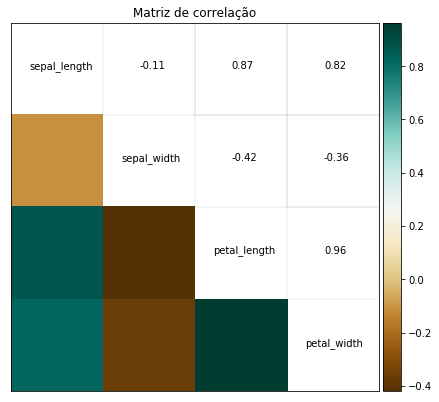

In [309]:
fig, ax = plt.subplots(figsize=(7, 7))
cm = df.iloc[:, :4].corr()

mask = np.tri(cm.shape[0], k=0).T
cm = np.ma.array(cm, mask=mask)
im = ax.imshow(cm, interpolation='nearest', cmap='BrBG')
# plt.xticks(np.arange(4), df.columns[:-1].to_list(), rotation=45)
# plt.yticks(np.arange(4), df.columns[:-1].to_list(), rotation=45)
plt.yticks([]); plt.xticks([]);
plt.title('Matriz de correlação')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

for i in range(4):
    for j in range(4):
        if i == j:
            ax.text(j-.3, i, df.columns[j])
        if j>i:
            ax.text(j-.1, i, '%.2f'%cm[j][i])
            rec = plt.Rectangle((j-.5, i-.5), 1, 1, color="#0000000A", fill=False, linewidth=2)
            ax = ax or plt.gca()
            ax.add_patch(rec)
plt.savefig('results/correlation_matrix_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

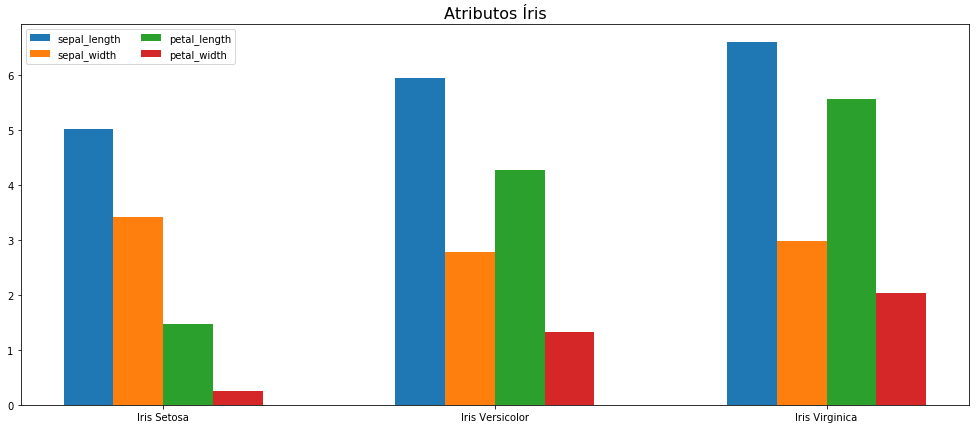

In [308]:
fig, ax = plt.subplots(figsize=(17, 7))
width = 0.15
labels = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']
attrs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = np.arange(len(labels))

setosa = df[df["class"] == "Iris-setosa"]
versicolor = df[df["class"] == "Iris-versicolor"]
virginica = df[df["class"] == "Iris-virginica"]

for i, att in enumerate(attrs):
    y = [setosa[att].values.mean(), versicolor[att].values.mean(), 
         virginica[att].values.mean()]
    ax.bar(x-width/2, y, width, label=att)
    x = x+width

ax.set_xticks(x-(width*3))
ax.set_xticklabels(labels)
ax.set_title('Atributos Íris', fontdict=dict(size=16))
plt.legend(ncol=2)

plt.savefig('results/attributes_bar_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

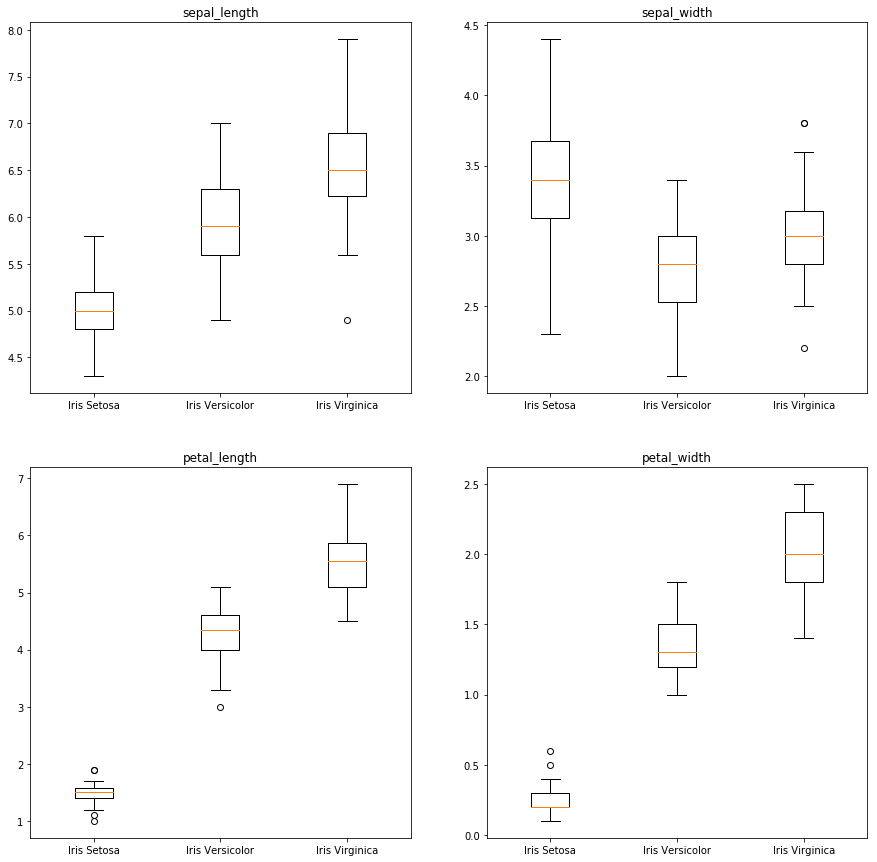

In [307]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
idx = 0
for i in range(2):
    for j in range(2):
        y = [setosa[attrs[idx]], versicolor[attrs[idx]], virginica[attrs[idx]]]
#         print(y)
        _ = ax[i][j].boxplot(y)
        _ = ax[i][j].set_xticklabels(labels)
        _ = ax[i][j].set_title(attrs[idx])
        idx+=1
plt.savefig('results/attributes_boxplot_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

In [458]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras import optimizers
from sklearn.metrics import confusion_matrix


X = df.iloc[:, :4].values
y = df.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)
y = np_utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [459]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=4))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Train on 127 samples, validate on 23 samples
Epoch 1/1000
127/127 [==============================] - 1s 6ms/step - loss: 1.4737 - categorical_accuracy: 0.0157 - val_loss: 1.4828 - val_categorical_accuracy: 0.0000e+00
Epoch 2/1000
127/127 [==============================] - 0s 61us/step - loss: 1.4244 - categorical_accuracy: 0.0079 - val_loss: 1.4318 - val_categorical_accuracy: 0.0000e+00
Epoch 3/1000
127/127 [==============================] - 0s 69us/step - loss: 1.3745 - categorical_accuracy: 0.0000e+00 - val_loss: 1.3827 - val_categorical_accuracy: 0.0000e+00
Epoch 4/1000
127/127 [==============================] - 0s 80us/step - loss: 1.3294 - categorical_accuracy: 0.0000e+00 - val_loss: 1.3344 - val_categorical_accuracy: 0.0000e+00
Epoch 5/1000
127/127 [==============================] - 0s 76us/step - loss: 1.2855 - categorical_accuracy: 0.0000e+00 - val_loss: 1.2876 - val_categorical_accuracy: 0.0000e+00
Epoch 6/1000
127/127 [==============================] - 0s 86us/step - loss: 1.

127/127 [==============================] - 0s 79us/step - loss: 0.7216 - categorical_accuracy: 0.8425 - val_loss: 0.7199 - val_categorical_accuracy: 0.8696
Epoch 49/1000
127/127 [==============================] - 0s 64us/step - loss: 0.7166 - categorical_accuracy: 0.8740 - val_loss: 0.7150 - val_categorical_accuracy: 0.8696
Epoch 50/1000
127/127 [==============================] - 0s 82us/step - loss: 0.7115 - categorical_accuracy: 0.9213 - val_loss: 0.7103 - val_categorical_accuracy: 0.8696
Epoch 51/1000
127/127 [==============================] - 0s 67us/step - loss: 0.7064 - categorical_accuracy: 0.9291 - val_loss: 0.7057 - val_categorical_accuracy: 0.8696
Epoch 52/1000
127/127 [==============================] - 0s 65us/step - loss: 0.7014 - categorical_accuracy: 0.9291 - val_loss: 0.7010 - val_categorical_accuracy: 0.8696
Epoch 53/1000
127/127 [==============================] - 0s 73us/step - loss: 0.6966 - categorical_accuracy: 0.9370 - val_loss: 0.6964 - val_categorical_accuracy: 0

127/127 [==============================] - 0s 57us/step - loss: 0.5353 - categorical_accuracy: 0.9449 - val_loss: 0.5442 - val_categorical_accuracy: 0.8696
Epoch 97/1000
127/127 [==============================] - 0s 55us/step - loss: 0.5324 - categorical_accuracy: 0.9449 - val_loss: 0.5412 - val_categorical_accuracy: 0.8696
Epoch 98/1000
127/127 [==============================] - 0s 67us/step - loss: 0.5294 - categorical_accuracy: 0.9449 - val_loss: 0.5382 - val_categorical_accuracy: 0.8696
Epoch 99/1000
127/127 [==============================] - 0s 79us/step - loss: 0.5265 - categorical_accuracy: 0.9449 - val_loss: 0.5352 - val_categorical_accuracy: 0.8696
Epoch 100/1000
127/127 [==============================] - 0s 59us/step - loss: 0.5236 - categorical_accuracy: 0.9449 - val_loss: 0.5325 - val_categorical_accuracy: 0.8696
Epoch 101/1000
127/127 [==============================] - 0s 72us/step - loss: 0.5206 - categorical_accuracy: 0.9528 - val_loss: 0.5295 - val_categorical_accuracy:

127/127 [==============================] - 0s 63us/step - loss: 0.4137 - categorical_accuracy: 0.9764 - val_loss: 0.4287 - val_categorical_accuracy: 0.9130
Epoch 145/1000
127/127 [==============================] - 0s 61us/step - loss: 0.4118 - categorical_accuracy: 0.9764 - val_loss: 0.4268 - val_categorical_accuracy: 0.9130
Epoch 146/1000
127/127 [==============================] - 0s 81us/step - loss: 0.4097 - categorical_accuracy: 0.9764 - val_loss: 0.4251 - val_categorical_accuracy: 0.9130
Epoch 147/1000
127/127 [==============================] - 0s 62us/step - loss: 0.4076 - categorical_accuracy: 0.9764 - val_loss: 0.4233 - val_categorical_accuracy: 0.9130
Epoch 148/1000
127/127 [==============================] - 0s 92us/step - loss: 0.4056 - categorical_accuracy: 0.9764 - val_loss: 0.4213 - val_categorical_accuracy: 0.9130
Epoch 149/1000
127/127 [==============================] - 0s 80us/step - loss: 0.4036 - categorical_accuracy: 0.9764 - val_loss: 0.4196 - val_categorical_accura

Epoch 192/1000
127/127 [==============================] - 0s 81us/step - loss: 0.3298 - categorical_accuracy: 0.9843 - val_loss: 0.3552 - val_categorical_accuracy: 0.9130
Epoch 193/1000
127/127 [==============================] - 0s 76us/step - loss: 0.3282 - categorical_accuracy: 0.9843 - val_loss: 0.3539 - val_categorical_accuracy: 0.9130
Epoch 194/1000
127/127 [==============================] - 0s 63us/step - loss: 0.3268 - categorical_accuracy: 0.9843 - val_loss: 0.3526 - val_categorical_accuracy: 0.9130
Epoch 195/1000
127/127 [==============================] - 0s 76us/step - loss: 0.3254 - categorical_accuracy: 0.9843 - val_loss: 0.3514 - val_categorical_accuracy: 0.9130
Epoch 196/1000
127/127 [==============================] - 0s 55us/step - loss: 0.3239 - categorical_accuracy: 0.9843 - val_loss: 0.3502 - val_categorical_accuracy: 0.9130
Epoch 197/1000
127/127 [==============================] - 0s 69us/step - loss: 0.3226 - categorical_accuracy: 0.9843 - val_loss: 0.3491 - val_cat

Epoch 240/1000
127/127 [==============================] - 0s 73us/step - loss: 0.2701 - categorical_accuracy: 0.9843 - val_loss: 0.3047 - val_categorical_accuracy: 0.9130
Epoch 241/1000
127/127 [==============================] - 0s 48us/step - loss: 0.2690 - categorical_accuracy: 0.9843 - val_loss: 0.3037 - val_categorical_accuracy: 0.9130
Epoch 242/1000
127/127 [==============================] - 0s 67us/step - loss: 0.2680 - categorical_accuracy: 0.9843 - val_loss: 0.3029 - val_categorical_accuracy: 0.9130
Epoch 243/1000
127/127 [==============================] - 0s 59us/step - loss: 0.2669 - categorical_accuracy: 0.9843 - val_loss: 0.3020 - val_categorical_accuracy: 0.9130
Epoch 244/1000
127/127 [==============================] - 0s 60us/step - loss: 0.2659 - categorical_accuracy: 0.9843 - val_loss: 0.3011 - val_categorical_accuracy: 0.9130
Epoch 245/1000
127/127 [==============================] - 0s 56us/step - loss: 0.2648 - categorical_accuracy: 0.9843 - val_loss: 0.3003 - val_cat

Epoch 288/1000
127/127 [==============================] - 0s 69us/step - loss: 0.2259 - categorical_accuracy: 0.9843 - val_loss: 0.2685 - val_categorical_accuracy: 0.9130
Epoch 289/1000
127/127 [==============================] - 0s 79us/step - loss: 0.2250 - categorical_accuracy: 0.9843 - val_loss: 0.2678 - val_categorical_accuracy: 0.9130
Epoch 290/1000
127/127 [==============================] - 0s 97us/step - loss: 0.2243 - categorical_accuracy: 0.9843 - val_loss: 0.2670 - val_categorical_accuracy: 0.9130
Epoch 291/1000
127/127 [==============================] - 0s 53us/step - loss: 0.2235 - categorical_accuracy: 0.9843 - val_loss: 0.2665 - val_categorical_accuracy: 0.9130
Epoch 292/1000
127/127 [==============================] - 0s 89us/step - loss: 0.2226 - categorical_accuracy: 0.9843 - val_loss: 0.2658 - val_categorical_accuracy: 0.9130
Epoch 293/1000
127/127 [==============================] - 0s 75us/step - loss: 0.2220 - categorical_accuracy: 0.9843 - val_loss: 0.2653 - val_cat

Epoch 336/1000
127/127 [==============================] - 0s 61us/step - loss: 0.1919 - categorical_accuracy: 0.9843 - val_loss: 0.2408 - val_categorical_accuracy: 0.9130
Epoch 337/1000
127/127 [==============================] - 0s 65us/step - loss: 0.1913 - categorical_accuracy: 0.9843 - val_loss: 0.2404 - val_categorical_accuracy: 0.9130
Epoch 338/1000
127/127 [==============================] - 0s 63us/step - loss: 0.1908 - categorical_accuracy: 0.9843 - val_loss: 0.2400 - val_categorical_accuracy: 0.9130
Epoch 339/1000
127/127 [==============================] - 0s 64us/step - loss: 0.1903 - categorical_accuracy: 0.9843 - val_loss: 0.2391 - val_categorical_accuracy: 0.9130
Epoch 340/1000
127/127 [==============================] - 0s 55us/step - loss: 0.1895 - categorical_accuracy: 0.9843 - val_loss: 0.2386 - val_categorical_accuracy: 0.9130
Epoch 341/1000
127/127 [==============================] - 0s 67us/step - loss: 0.1888 - categorical_accuracy: 0.9843 - val_loss: 0.2382 - val_cat

Epoch 384/1000
127/127 [==============================] - 0s 71us/step - loss: 0.1661 - categorical_accuracy: 0.9921 - val_loss: 0.2196 - val_categorical_accuracy: 0.9130
Epoch 385/1000
127/127 [==============================] - 0s 72us/step - loss: 0.1652 - categorical_accuracy: 0.9921 - val_loss: 0.2193 - val_categorical_accuracy: 0.9130
Epoch 386/1000
127/127 [==============================] - 0s 100us/step - loss: 0.1647 - categorical_accuracy: 0.9921 - val_loss: 0.2187 - val_categorical_accuracy: 0.9130
Epoch 387/1000
127/127 [==============================] - 0s 97us/step - loss: 0.1642 - categorical_accuracy: 0.9921 - val_loss: 0.2183 - val_categorical_accuracy: 0.9130
Epoch 388/1000
127/127 [==============================] - 0s 95us/step - loss: 0.1639 - categorical_accuracy: 0.9921 - val_loss: 0.2173 - val_categorical_accuracy: 0.9130
Epoch 389/1000
127/127 [==============================] - 0s 95us/step - loss: 0.1633 - categorical_accuracy: 0.9921 - val_loss: 0.2170 - val_ca

Epoch 432/1000
127/127 [==============================] - 0s 78us/step - loss: 0.1450 - categorical_accuracy: 0.9921 - val_loss: 0.2022 - val_categorical_accuracy: 0.9130
Epoch 433/1000
127/127 [==============================] - 0s 69us/step - loss: 0.1447 - categorical_accuracy: 0.9921 - val_loss: 0.2025 - val_categorical_accuracy: 0.9130
Epoch 434/1000
127/127 [==============================] - 0s 74us/step - loss: 0.1442 - categorical_accuracy: 0.9921 - val_loss: 0.2021 - val_categorical_accuracy: 0.9130
Epoch 435/1000
127/127 [==============================] - 0s 65us/step - loss: 0.1442 - categorical_accuracy: 0.9921 - val_loss: 0.2012 - val_categorical_accuracy: 0.9130
Epoch 436/1000
127/127 [==============================] - 0s 57us/step - loss: 0.1435 - categorical_accuracy: 0.9921 - val_loss: 0.2010 - val_categorical_accuracy: 0.9130
Epoch 437/1000
127/127 [==============================] - 0s 63us/step - loss: 0.1431 - categorical_accuracy: 0.9921 - val_loss: 0.2012 - val_cat

Epoch 480/1000
127/127 [==============================] - 0s 47us/step - loss: 0.1288 - categorical_accuracy: 0.9921 - val_loss: 0.1891 - val_categorical_accuracy: 0.9130
Epoch 481/1000
127/127 [==============================] - 0s 80us/step - loss: 0.1284 - categorical_accuracy: 0.9921 - val_loss: 0.1884 - val_categorical_accuracy: 0.9130
Epoch 482/1000
127/127 [==============================] - 0s 122us/step - loss: 0.1282 - categorical_accuracy: 0.9921 - val_loss: 0.1886 - val_categorical_accuracy: 0.9130
Epoch 483/1000
127/127 [==============================] - 0s 92us/step - loss: 0.1281 - categorical_accuracy: 0.9921 - val_loss: 0.1875 - val_categorical_accuracy: 0.9130
Epoch 484/1000
127/127 [==============================] - 0s 88us/step - loss: 0.1277 - categorical_accuracy: 0.9921 - val_loss: 0.1883 - val_categorical_accuracy: 0.9130
Epoch 485/1000
127/127 [==============================] - 0s 87us/step - loss: 0.1272 - categorical_accuracy: 0.9921 - val_loss: 0.1881 - val_ca

Epoch 528/1000
127/127 [==============================] - 0s 94us/step - loss: 0.1156 - categorical_accuracy: 0.9921 - val_loss: 0.1790 - val_categorical_accuracy: 0.9130
Epoch 529/1000
127/127 [==============================] - 0s 104us/step - loss: 0.1154 - categorical_accuracy: 0.9921 - val_loss: 0.1786 - val_categorical_accuracy: 0.9130
Epoch 530/1000
127/127 [==============================] - 0s 81us/step - loss: 0.1155 - categorical_accuracy: 0.9921 - val_loss: 0.1774 - val_categorical_accuracy: 0.9130
Epoch 531/1000
127/127 [==============================] - 0s 84us/step - loss: 0.1149 - categorical_accuracy: 0.9921 - val_loss: 0.1775 - val_categorical_accuracy: 0.9130
Epoch 532/1000
127/127 [==============================] - 0s 94us/step - loss: 0.1151 - categorical_accuracy: 0.9921 - val_loss: 0.1766 - val_categorical_accuracy: 0.9130
Epoch 533/1000
127/127 [==============================] - 0s 71us/step - loss: 0.1144 - categorical_accuracy: 0.9921 - val_loss: 0.1772 - val_ca

Epoch 576/1000
127/127 [==============================] - 0s 82us/step - loss: 0.1051 - categorical_accuracy: 0.9921 - val_loss: 0.1703 - val_categorical_accuracy: 0.9130
Epoch 577/1000
127/127 [==============================] - 0s 71us/step - loss: 0.1049 - categorical_accuracy: 0.9921 - val_loss: 0.1704 - val_categorical_accuracy: 0.9130
Epoch 578/1000
127/127 [==============================] - 0s 69us/step - loss: 0.1049 - categorical_accuracy: 0.9921 - val_loss: 0.1693 - val_categorical_accuracy: 0.9130
Epoch 579/1000
127/127 [==============================] - 0s 107us/step - loss: 0.1046 - categorical_accuracy: 0.9921 - val_loss: 0.1689 - val_categorical_accuracy: 0.9130
Epoch 580/1000
127/127 [==============================] - 0s 116us/step - loss: 0.1043 - categorical_accuracy: 0.9921 - val_loss: 0.1687 - val_categorical_accuracy: 0.9130
Epoch 581/1000
127/127 [==============================] - 0s 107us/step - loss: 0.1042 - categorical_accuracy: 0.9921 - val_loss: 0.1693 - val_

Epoch 624/1000
127/127 [==============================] - 0s 54us/step - loss: 0.0966 - categorical_accuracy: 0.9921 - val_loss: 0.1631 - val_categorical_accuracy: 0.9130
Epoch 625/1000
127/127 [==============================] - 0s 68us/step - loss: 0.0963 - categorical_accuracy: 0.9921 - val_loss: 0.1634 - val_categorical_accuracy: 0.9130
Epoch 626/1000
127/127 [==============================] - 0s 47us/step - loss: 0.0961 - categorical_accuracy: 0.9921 - val_loss: 0.1633 - val_categorical_accuracy: 0.9130
Epoch 627/1000
127/127 [==============================] - 0s 70us/step - loss: 0.0960 - categorical_accuracy: 0.9921 - val_loss: 0.1633 - val_categorical_accuracy: 0.9130
Epoch 628/1000
127/127 [==============================] - 0s 52us/step - loss: 0.0958 - categorical_accuracy: 0.9921 - val_loss: 0.1631 - val_categorical_accuracy: 0.9130
Epoch 629/1000
127/127 [==============================] - 0s 68us/step - loss: 0.0956 - categorical_accuracy: 0.9921 - val_loss: 0.1627 - val_cat

Epoch 672/1000
127/127 [==============================] - 0s 83us/step - loss: 0.0893 - categorical_accuracy: 0.9921 - val_loss: 0.1567 - val_categorical_accuracy: 0.9130
Epoch 673/1000
127/127 [==============================] - 0s 68us/step - loss: 0.0892 - categorical_accuracy: 0.9921 - val_loss: 0.1571 - val_categorical_accuracy: 0.9130
Epoch 674/1000
127/127 [==============================] - 0s 90us/step - loss: 0.0891 - categorical_accuracy: 0.9921 - val_loss: 0.1572 - val_categorical_accuracy: 0.9130
Epoch 675/1000
127/127 [==============================] - 0s 82us/step - loss: 0.0890 - categorical_accuracy: 0.9921 - val_loss: 0.1564 - val_categorical_accuracy: 0.9130
Epoch 676/1000
127/127 [==============================] - 0s 56us/step - loss: 0.0889 - categorical_accuracy: 0.9921 - val_loss: 0.1572 - val_categorical_accuracy: 0.9130
Epoch 677/1000
127/127 [==============================] - 0s 82us/step - loss: 0.0886 - categorical_accuracy: 0.9921 - val_loss: 0.1566 - val_cat

Epoch 720/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0834 - categorical_accuracy: 0.9921 - val_loss: 0.1519 - val_categorical_accuracy: 0.9130
Epoch 721/1000
127/127 [==============================] - 0s 87us/step - loss: 0.0833 - categorical_accuracy: 0.9921 - val_loss: 0.1514 - val_categorical_accuracy: 0.9130
Epoch 722/1000
127/127 [==============================] - 0s 75us/step - loss: 0.0831 - categorical_accuracy: 0.9921 - val_loss: 0.1518 - val_categorical_accuracy: 0.9130
Epoch 723/1000
127/127 [==============================] - 0s 66us/step - loss: 0.0836 - categorical_accuracy: 0.9921 - val_loss: 0.1536 - val_categorical_accuracy: 0.9130
Epoch 724/1000
127/127 [==============================] - 0s 81us/step - loss: 0.0829 - categorical_accuracy: 0.9921 - val_loss: 0.1535 - val_categorical_accuracy: 0.9130
Epoch 725/1000
127/127 [==============================] - 0s 46us/step - loss: 0.0828 - categorical_accuracy: 0.9921 - val_loss: 0.1524 - val_cat

Epoch 768/1000
127/127 [==============================] - 0s 61us/step - loss: 0.0784 - categorical_accuracy: 0.9921 - val_loss: 0.1482 - val_categorical_accuracy: 0.9130
Epoch 769/1000
127/127 [==============================] - 0s 62us/step - loss: 0.0784 - categorical_accuracy: 0.9921 - val_loss: 0.1488 - val_categorical_accuracy: 0.9130
Epoch 770/1000
127/127 [==============================] - 0s 65us/step - loss: 0.0781 - categorical_accuracy: 0.9921 - val_loss: 0.1480 - val_categorical_accuracy: 0.9130
Epoch 771/1000
127/127 [==============================] - 0s 67us/step - loss: 0.0781 - categorical_accuracy: 0.9921 - val_loss: 0.1474 - val_categorical_accuracy: 0.9130
Epoch 772/1000
127/127 [==============================] - 0s 53us/step - loss: 0.0781 - categorical_accuracy: 0.9921 - val_loss: 0.1481 - val_categorical_accuracy: 0.9130
Epoch 773/1000
127/127 [==============================] - 0s 74us/step - loss: 0.0779 - categorical_accuracy: 0.9921 - val_loss: 0.1476 - val_cat

Epoch 816/1000
127/127 [==============================] - 0s 80us/step - loss: 0.0745 - categorical_accuracy: 0.9921 - val_loss: 0.1447 - val_categorical_accuracy: 0.9130
Epoch 817/1000
127/127 [==============================] - 0s 60us/step - loss: 0.0743 - categorical_accuracy: 0.9921 - val_loss: 0.1461 - val_categorical_accuracy: 0.9130
Epoch 818/1000
127/127 [==============================] - 0s 70us/step - loss: 0.0740 - categorical_accuracy: 0.9921 - val_loss: 0.1465 - val_categorical_accuracy: 0.9130
Epoch 819/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0740 - categorical_accuracy: 0.9921 - val_loss: 0.1456 - val_categorical_accuracy: 0.9130
Epoch 820/1000
127/127 [==============================] - 0s 75us/step - loss: 0.0738 - categorical_accuracy: 0.9921 - val_loss: 0.1452 - val_categorical_accuracy: 0.9130
Epoch 821/1000
127/127 [==============================] - 0s 101us/step - loss: 0.0737 - categorical_accuracy: 0.9921 - val_loss: 0.1448 - val_ca

Epoch 864/1000
127/127 [==============================] - 0s 59us/step - loss: 0.0706 - categorical_accuracy: 0.9921 - val_loss: 0.1425 - val_categorical_accuracy: 0.9130
Epoch 865/1000
127/127 [==============================] - 0s 60us/step - loss: 0.0704 - categorical_accuracy: 0.9921 - val_loss: 0.1427 - val_categorical_accuracy: 0.9130
Epoch 866/1000
127/127 [==============================] - 0s 67us/step - loss: 0.0704 - categorical_accuracy: 0.9921 - val_loss: 0.1422 - val_categorical_accuracy: 0.9130
Epoch 867/1000
127/127 [==============================] - 0s 81us/step - loss: 0.0703 - categorical_accuracy: 0.9921 - val_loss: 0.1420 - val_categorical_accuracy: 0.9130
Epoch 868/1000
127/127 [==============================] - 0s 61us/step - loss: 0.0702 - categorical_accuracy: 0.9921 - val_loss: 0.1423 - val_categorical_accuracy: 0.9130
Epoch 869/1000
127/127 [==============================] - 0s 65us/step - loss: 0.0701 - categorical_accuracy: 0.9921 - val_loss: 0.1419 - val_cat

Epoch 912/1000
127/127 [==============================] - 0s 47us/step - loss: 0.0674 - categorical_accuracy: 0.9921 - val_loss: 0.1400 - val_categorical_accuracy: 0.9130
Epoch 913/1000
127/127 [==============================] - 0s 70us/step - loss: 0.0673 - categorical_accuracy: 0.9921 - val_loss: 0.1404 - val_categorical_accuracy: 0.9130
Epoch 914/1000
127/127 [==============================] - 0s 58us/step - loss: 0.0672 - categorical_accuracy: 0.9921 - val_loss: 0.1409 - val_categorical_accuracy: 0.9130
Epoch 915/1000
127/127 [==============================] - 0s 85us/step - loss: 0.0672 - categorical_accuracy: 0.9921 - val_loss: 0.1406 - val_categorical_accuracy: 0.9130
Epoch 916/1000
127/127 [==============================] - 0s 86us/step - loss: 0.0671 - categorical_accuracy: 0.9921 - val_loss: 0.1410 - val_categorical_accuracy: 0.9130
Epoch 917/1000
127/127 [==============================] - 0s 61us/step - loss: 0.0671 - categorical_accuracy: 0.9921 - val_loss: 0.1405 - val_cat

Epoch 960/1000
127/127 [==============================] - 0s 80us/step - loss: 0.0646 - categorical_accuracy: 0.9921 - val_loss: 0.1386 - val_categorical_accuracy: 0.9130
Epoch 961/1000
127/127 [==============================] - 0s 88us/step - loss: 0.0646 - categorical_accuracy: 0.9921 - val_loss: 0.1387 - val_categorical_accuracy: 0.9130
Epoch 962/1000
127/127 [==============================] - 0s 80us/step - loss: 0.0646 - categorical_accuracy: 0.9921 - val_loss: 0.1377 - val_categorical_accuracy: 0.9130
Epoch 963/1000
127/127 [==============================] - 0s 73us/step - loss: 0.0645 - categorical_accuracy: 0.9921 - val_loss: 0.1387 - val_categorical_accuracy: 0.9130
Epoch 964/1000
127/127 [==============================] - 0s 58us/step - loss: 0.0644 - categorical_accuracy: 0.9921 - val_loss: 0.1386 - val_categorical_accuracy: 0.9130
Epoch 965/1000
127/127 [==============================] - 0s 73us/step - loss: 0.0643 - categorical_accuracy: 0.9921 - val_loss: 0.1383 - val_cat

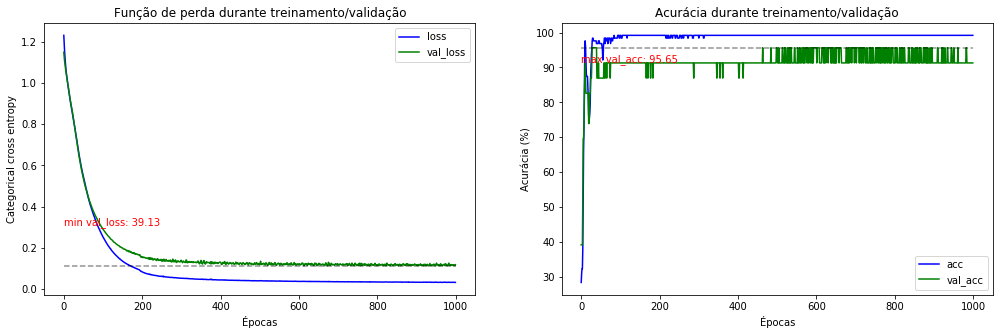

In [500]:
loss, val_loss = np.array(history.history['loss']), np.array(history.history['val_loss'])
acc, val_acc = np.array(history.history['categorical_accuracy'])*100, \
               np.array(history.history['val_categorical_accuracy'])*100
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax[0].plot(loss, label='loss', color='blue')
ax[0].plot(val_loss, label='val_loss', color='green')
ax[0].plot([0, len(val_loss)], [val_loss.min(), val_loss.min()], color='#0000006D', linestyle='--')
ax[0].text(0, val_loss.min()+.2, 'min val_loss: %.2f'%val_acc.min(), color='red')
ax[0].legend()
ax[0].set_title('Função de perda durante treinamento/validação')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Categorical cross entropy')
ax[1].plot(acc, label='acc', color='blue')
ax[1].plot(val_acc, label='val_acc', color='green')
ax[1].plot([0, len(val_acc)], [val_acc.max(), val_acc.max()], color='#0000006D', linestyle='--')
ax[1].text(0, val_acc.max()-4, 'max val_acc: %.2f'%val_acc.max(), color='red')
ax[1].legend()
ax[1].set_title('Acurácia durante treinamento/validação')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Acurácia (%)')

plt.savefig('results/metrics_001_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

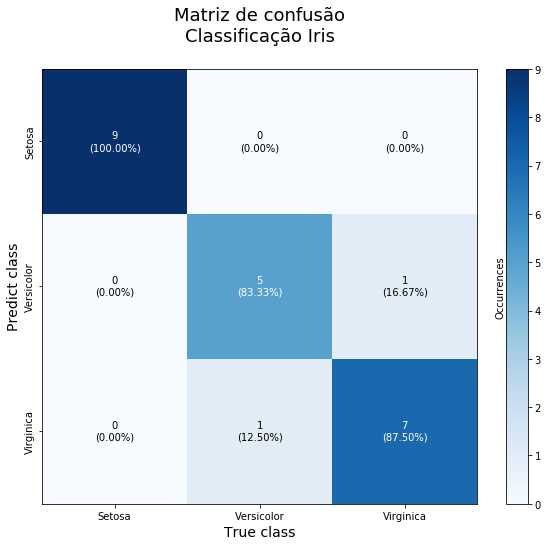

In [501]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
figsize = (15, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)

cmap = plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)

total_samples = cm.sum(axis=1)[:, np.newaxis]
normed_conf_mat = cm.astype('float') / total_samples
labels = ['Setosa', 'Versicolor', 'Virginica']
label_font = dict(fontweight='normal', size=14)
title_font = dict(fontweight='normal', size=18)

matshow = ax.matshow(cm, cmap=cmap)
cb = plt.colorbar(matshow, cax=cax, orientation='vertical')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text = str(cm[i, j])
        cell_text += '\n(%.2f%%)' % (normed_conf_mat[i, j] * 100)
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels, rotation=90, va='center')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     ax.set_title('Matriz de confusão para %d testes'%((n*2)*0.2), fontdict=title_font)
ax.set_xlabel('True class', fontdict=label_font)
ax.set_ylabel('Predict class', fontdict=label_font)
cb.ax.set_ylabel('Occurrences', va='center', rotation=-270, labelpad=-40)
ax.set_title('Matriz de confusão\nClassificação Iris', fontdict=title_font)

plt.savefig('results/confusion_matrix_001_iris.pdf', dpi=300, \
           bbox_inches='tight', transparent=False, pad_inches=0.1)
plt.show()

In [497]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=4))
model.add(Dense(units=8, activation='relu', input_dim=4))

model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Train on 127 samples, validate on 23 samples
Epoch 1/1000
127/127 [==============================] - 1s 7ms/step - loss: 1.2310 - categorical_accuracy: 0.2835 - val_loss: 1.1489 - val_categorical_accuracy: 0.3913
Epoch 2/1000
127/127 [==============================] - 0s 92us/step - loss: 1.1862 - categorical_accuracy: 0.3071 - val_loss: 1.1252 - val_categorical_accuracy: 0.3913
Epoch 3/1000
127/127 [==============================] - 0s 90us/step - loss: 1.1540 - categorical_accuracy: 0.3228 - val_loss: 1.1061 - val_categorical_accuracy: 0.3913
Epoch 4/1000
127/127 [==============================] - 0s 84us/step - loss: 1.1239 - categorical_accuracy: 0.3228 - val_loss: 1.0889 - val_categorical_accuracy: 0.3913
Epoch 5/1000
127/127 [==============================] - 0s 92us/step - loss: 1.0988 - categorical_accuracy: 0.3780 - val_loss: 1.0731 - val_categorical_accuracy: 0.5217
Epoch 6/1000
127/127 [==============================] - 0s 75us/step - loss: 1.0762 - categorical_accuracy: 0.5

Epoch 49/1000
127/127 [==============================] - 0s 98us/step - loss: 0.5617 - categorical_accuracy: 0.9685 - val_loss: 0.5529 - val_categorical_accuracy: 0.8696
Epoch 50/1000
127/127 [==============================] - 0s 69us/step - loss: 0.5533 - categorical_accuracy: 0.9685 - val_loss: 0.5439 - val_categorical_accuracy: 0.8696
Epoch 51/1000
127/127 [==============================] - 0s 49us/step - loss: 0.5453 - categorical_accuracy: 0.9685 - val_loss: 0.5355 - val_categorical_accuracy: 0.8696
Epoch 52/1000
127/127 [==============================] - 0s 94us/step - loss: 0.5376 - categorical_accuracy: 0.9685 - val_loss: 0.5277 - val_categorical_accuracy: 0.8696
Epoch 53/1000
127/127 [==============================] - 0s 54us/step - loss: 0.5293 - categorical_accuracy: 0.9685 - val_loss: 0.5186 - val_categorical_accuracy: 0.8696
Epoch 54/1000
127/127 [==============================] - 0s 59us/step - loss: 0.5203 - categorical_accuracy: 0.9606 - val_loss: 0.5105 - val_categoric

127/127 [==============================] - 0s 96us/step - loss: 0.2667 - categorical_accuracy: 0.9921 - val_loss: 0.3016 - val_categorical_accuracy: 0.9130
Epoch 98/1000
127/127 [==============================] - 0s 92us/step - loss: 0.2645 - categorical_accuracy: 0.9843 - val_loss: 0.2991 - val_categorical_accuracy: 0.9130
Epoch 99/1000
127/127 [==============================] - 0s 105us/step - loss: 0.2597 - categorical_accuracy: 0.9843 - val_loss: 0.2960 - val_categorical_accuracy: 0.9130
Epoch 100/1000
127/127 [==============================] - 0s 78us/step - loss: 0.2556 - categorical_accuracy: 0.9921 - val_loss: 0.2929 - val_categorical_accuracy: 0.9130
Epoch 101/1000
127/127 [==============================] - 0s 88us/step - loss: 0.2522 - categorical_accuracy: 0.9921 - val_loss: 0.2899 - val_categorical_accuracy: 0.9130
Epoch 102/1000
127/127 [==============================] - 0s 99us/step - loss: 0.2488 - categorical_accuracy: 0.9921 - val_loss: 0.2872 - val_categorical_accurac

Epoch 145/1000
127/127 [==============================] - 0s 118us/step - loss: 0.1436 - categorical_accuracy: 0.9921 - val_loss: 0.2049 - val_categorical_accuracy: 0.9130
Epoch 146/1000
127/127 [==============================] - 0s 84us/step - loss: 0.1419 - categorical_accuracy: 0.9921 - val_loss: 0.2035 - val_categorical_accuracy: 0.9130
Epoch 147/1000
127/127 [==============================] - 0s 85us/step - loss: 0.1408 - categorical_accuracy: 0.9921 - val_loss: 0.2016 - val_categorical_accuracy: 0.9130
Epoch 148/1000
127/127 [==============================] - 0s 131us/step - loss: 0.1389 - categorical_accuracy: 0.9921 - val_loss: 0.2007 - val_categorical_accuracy: 0.9130
Epoch 149/1000
127/127 [==============================] - 0s 94us/step - loss: 0.1374 - categorical_accuracy: 0.9921 - val_loss: 0.1995 - val_categorical_accuracy: 0.9130
Epoch 150/1000
127/127 [==============================] - 0s 94us/step - loss: 0.1363 - categorical_accuracy: 0.9921 - val_loss: 0.1998 - val_c

Epoch 193/1000
127/127 [==============================] - 0s 100us/step - loss: 0.0933 - categorical_accuracy: 0.9921 - val_loss: 0.1640 - val_categorical_accuracy: 0.9130
Epoch 194/1000
127/127 [==============================] - 0s 90us/step - loss: 0.0918 - categorical_accuracy: 0.9921 - val_loss: 0.1661 - val_categorical_accuracy: 0.9130
Epoch 195/1000
127/127 [==============================] - 0s 81us/step - loss: 0.0903 - categorical_accuracy: 0.9921 - val_loss: 0.1656 - val_categorical_accuracy: 0.9130
Epoch 196/1000
127/127 [==============================] - 0s 82us/step - loss: 0.0884 - categorical_accuracy: 0.9921 - val_loss: 0.1599 - val_categorical_accuracy: 0.9130
Epoch 197/1000
127/127 [==============================] - 0s 85us/step - loss: 0.0864 - categorical_accuracy: 0.9921 - val_loss: 0.1551 - val_categorical_accuracy: 0.9130
Epoch 198/1000
127/127 [==============================] - 0s 53us/step - loss: 0.0854 - categorical_accuracy: 0.9921 - val_loss: 0.1558 - val_ca

Epoch 241/1000
127/127 [==============================] - 0s 88us/step - loss: 0.0632 - categorical_accuracy: 0.9843 - val_loss: 0.1457 - val_categorical_accuracy: 0.9130
Epoch 242/1000
127/127 [==============================] - 0s 62us/step - loss: 0.0624 - categorical_accuracy: 0.9843 - val_loss: 0.1408 - val_categorical_accuracy: 0.9130
Epoch 243/1000
127/127 [==============================] - 0s 89us/step - loss: 0.0623 - categorical_accuracy: 0.9921 - val_loss: 0.1384 - val_categorical_accuracy: 0.9130
Epoch 244/1000
127/127 [==============================] - 0s 73us/step - loss: 0.0618 - categorical_accuracy: 0.9921 - val_loss: 0.1390 - val_categorical_accuracy: 0.9130
Epoch 245/1000
127/127 [==============================] - 0s 68us/step - loss: 0.0615 - categorical_accuracy: 0.9921 - val_loss: 0.1392 - val_categorical_accuracy: 0.9130
Epoch 246/1000
127/127 [==============================] - 0s 97us/step - loss: 0.0612 - categorical_accuracy: 0.9921 - val_loss: 0.1392 - val_cat

Epoch 289/1000
127/127 [==============================] - 0s 79us/step - loss: 0.0534 - categorical_accuracy: 0.9921 - val_loss: 0.1307 - val_categorical_accuracy: 0.9130
Epoch 290/1000
127/127 [==============================] - 0s 90us/step - loss: 0.0535 - categorical_accuracy: 0.9921 - val_loss: 0.1346 - val_categorical_accuracy: 0.9130
Epoch 291/1000
127/127 [==============================] - 0s 58us/step - loss: 0.0529 - categorical_accuracy: 0.9921 - val_loss: 0.1347 - val_categorical_accuracy: 0.9130
Epoch 292/1000
127/127 [==============================] - 0s 46us/step - loss: 0.0534 - categorical_accuracy: 0.9921 - val_loss: 0.1315 - val_categorical_accuracy: 0.9130
Epoch 293/1000
127/127 [==============================] - 0s 73us/step - loss: 0.0528 - categorical_accuracy: 0.9921 - val_loss: 0.1356 - val_categorical_accuracy: 0.9130
Epoch 294/1000
127/127 [==============================] - 0s 70us/step - loss: 0.0528 - categorical_accuracy: 0.9921 - val_loss: 0.1342 - val_cat

127/127 [==============================] - 0s 95us/step - loss: 0.0479 - categorical_accuracy: 0.9921 - val_loss: 0.1293 - val_categorical_accuracy: 0.9130
Epoch 337/1000
127/127 [==============================] - 0s 93us/step - loss: 0.0477 - categorical_accuracy: 0.9921 - val_loss: 0.1299 - val_categorical_accuracy: 0.9130
Epoch 338/1000
127/127 [==============================] - 0s 91us/step - loss: 0.0477 - categorical_accuracy: 0.9921 - val_loss: 0.1277 - val_categorical_accuracy: 0.9130
Epoch 339/1000
127/127 [==============================] - 0s 71us/step - loss: 0.0480 - categorical_accuracy: 0.9921 - val_loss: 0.1285 - val_categorical_accuracy: 0.9130
Epoch 340/1000
127/127 [==============================] - 0s 80us/step - loss: 0.0478 - categorical_accuracy: 0.9921 - val_loss: 0.1274 - val_categorical_accuracy: 0.9130
Epoch 341/1000
127/127 [==============================] - 0s 65us/step - loss: 0.0474 - categorical_accuracy: 0.9921 - val_loss: 0.1282 - val_categorical_accura

Epoch 384/1000
127/127 [==============================] - 0s 45us/step - loss: 0.0447 - categorical_accuracy: 0.9921 - val_loss: 0.1217 - val_categorical_accuracy: 0.9130
Epoch 385/1000
127/127 [==============================] - 0s 77us/step - loss: 0.0441 - categorical_accuracy: 0.9921 - val_loss: 0.1261 - val_categorical_accuracy: 0.9130
Epoch 386/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0443 - categorical_accuracy: 0.9921 - val_loss: 0.1294 - val_categorical_accuracy: 0.9130
Epoch 387/1000
127/127 [==============================] - 0s 68us/step - loss: 0.0442 - categorical_accuracy: 0.9921 - val_loss: 0.1298 - val_categorical_accuracy: 0.9130
Epoch 388/1000
127/127 [==============================] - 0s 91us/step - loss: 0.0447 - categorical_accuracy: 0.9921 - val_loss: 0.1255 - val_categorical_accuracy: 0.9130
Epoch 389/1000
127/127 [==============================] - 0s 74us/step - loss: 0.0440 - categorical_accuracy: 0.9921 - val_loss: 0.1242 - val_cat

Epoch 432/1000
127/127 [==============================] - 0s 110us/step - loss: 0.0421 - categorical_accuracy: 0.9921 - val_loss: 0.1258 - val_categorical_accuracy: 0.9130
Epoch 433/1000
127/127 [==============================] - 0s 111us/step - loss: 0.0421 - categorical_accuracy: 0.9921 - val_loss: 0.1276 - val_categorical_accuracy: 0.9130
Epoch 434/1000
127/127 [==============================] - 0s 90us/step - loss: 0.0414 - categorical_accuracy: 0.9921 - val_loss: 0.1248 - val_categorical_accuracy: 0.9130
Epoch 435/1000
127/127 [==============================] - 0s 75us/step - loss: 0.0413 - categorical_accuracy: 0.9921 - val_loss: 0.1203 - val_categorical_accuracy: 0.9130
Epoch 436/1000
127/127 [==============================] - 0s 97us/step - loss: 0.0416 - categorical_accuracy: 0.9921 - val_loss: 0.1193 - val_categorical_accuracy: 0.9130
Epoch 437/1000
127/127 [==============================] - 0s 108us/step - loss: 0.0414 - categorical_accuracy: 0.9921 - val_loss: 0.1198 - val_

Epoch 480/1000
127/127 [==============================] - 0s 48us/step - loss: 0.0397 - categorical_accuracy: 0.9921 - val_loss: 0.1204 - val_categorical_accuracy: 0.9130
Epoch 481/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0400 - categorical_accuracy: 0.9921 - val_loss: 0.1220 - val_categorical_accuracy: 0.9130
Epoch 482/1000
127/127 [==============================] - 0s 53us/step - loss: 0.0394 - categorical_accuracy: 0.9921 - val_loss: 0.1208 - val_categorical_accuracy: 0.9130
Epoch 483/1000
127/127 [==============================] - 0s 84us/step - loss: 0.0395 - categorical_accuracy: 0.9921 - val_loss: 0.1197 - val_categorical_accuracy: 0.9130
Epoch 484/1000
127/127 [==============================] - 0s 105us/step - loss: 0.0395 - categorical_accuracy: 0.9921 - val_loss: 0.1195 - val_categorical_accuracy: 0.9130
Epoch 485/1000
127/127 [==============================] - 0s 84us/step - loss: 0.0403 - categorical_accuracy: 0.9921 - val_loss: 0.1169 - val_ca

Epoch 528/1000
127/127 [==============================] - 0s 94us/step - loss: 0.0385 - categorical_accuracy: 0.9921 - val_loss: 0.1175 - val_categorical_accuracy: 0.9565
Epoch 529/1000
127/127 [==============================] - 0s 106us/step - loss: 0.0381 - categorical_accuracy: 0.9921 - val_loss: 0.1203 - val_categorical_accuracy: 0.9130
Epoch 530/1000
127/127 [==============================] - 0s 88us/step - loss: 0.0391 - categorical_accuracy: 0.9921 - val_loss: 0.1265 - val_categorical_accuracy: 0.9130
Epoch 531/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0381 - categorical_accuracy: 0.9921 - val_loss: 0.1247 - val_categorical_accuracy: 0.9130
Epoch 532/1000
127/127 [==============================] - 0s 89us/step - loss: 0.0387 - categorical_accuracy: 0.9921 - val_loss: 0.1170 - val_categorical_accuracy: 0.9565
Epoch 533/1000
127/127 [==============================] - 0s 59us/step - loss: 0.0388 - categorical_accuracy: 0.9921 - val_loss: 0.1210 - val_ca

Epoch 576/1000
127/127 [==============================] - 0s 82us/step - loss: 0.0370 - categorical_accuracy: 0.9921 - val_loss: 0.1212 - val_categorical_accuracy: 0.9565
Epoch 577/1000
127/127 [==============================] - 0s 67us/step - loss: 0.0368 - categorical_accuracy: 0.9921 - val_loss: 0.1219 - val_categorical_accuracy: 0.9130
Epoch 578/1000
127/127 [==============================] - 0s 90us/step - loss: 0.0372 - categorical_accuracy: 0.9921 - val_loss: 0.1182 - val_categorical_accuracy: 0.9565
Epoch 579/1000
127/127 [==============================] - 0s 73us/step - loss: 0.0372 - categorical_accuracy: 0.9921 - val_loss: 0.1181 - val_categorical_accuracy: 0.9565
Epoch 580/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0371 - categorical_accuracy: 0.9921 - val_loss: 0.1228 - val_categorical_accuracy: 0.9130
Epoch 581/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0372 - categorical_accuracy: 0.9921 - val_loss: 0.1268 - val_cat

Epoch 624/1000
127/127 [==============================] - 0s 81us/step - loss: 0.0357 - categorical_accuracy: 0.9921 - val_loss: 0.1207 - val_categorical_accuracy: 0.9565
Epoch 625/1000
127/127 [==============================] - 0s 92us/step - loss: 0.0359 - categorical_accuracy: 0.9921 - val_loss: 0.1249 - val_categorical_accuracy: 0.9130
Epoch 626/1000
127/127 [==============================] - 0s 80us/step - loss: 0.0370 - categorical_accuracy: 0.9921 - val_loss: 0.1182 - val_categorical_accuracy: 0.9565
Epoch 627/1000
127/127 [==============================] - 0s 73us/step - loss: 0.0357 - categorical_accuracy: 0.9921 - val_loss: 0.1201 - val_categorical_accuracy: 0.9565
Epoch 628/1000
127/127 [==============================] - 0s 91us/step - loss: 0.0357 - categorical_accuracy: 0.9921 - val_loss: 0.1217 - val_categorical_accuracy: 0.9565
Epoch 629/1000
127/127 [==============================] - 0s 78us/step - loss: 0.0360 - categorical_accuracy: 0.9921 - val_loss: 0.1220 - val_cat

Epoch 672/1000
127/127 [==============================] - 0s 80us/step - loss: 0.0350 - categorical_accuracy: 0.9921 - val_loss: 0.1154 - val_categorical_accuracy: 0.9130
Epoch 673/1000
127/127 [==============================] - 0s 83us/step - loss: 0.0351 - categorical_accuracy: 0.9921 - val_loss: 0.1125 - val_categorical_accuracy: 0.9130
Epoch 674/1000
127/127 [==============================] - 0s 83us/step - loss: 0.0353 - categorical_accuracy: 0.9921 - val_loss: 0.1117 - val_categorical_accuracy: 0.9130
Epoch 675/1000
127/127 [==============================] - 0s 74us/step - loss: 0.0353 - categorical_accuracy: 0.9921 - val_loss: 0.1149 - val_categorical_accuracy: 0.9130
Epoch 676/1000
127/127 [==============================] - 0s 78us/step - loss: 0.0365 - categorical_accuracy: 0.9921 - val_loss: 0.1293 - val_categorical_accuracy: 0.9130
Epoch 677/1000
127/127 [==============================] - 0s 49us/step - loss: 0.0354 - categorical_accuracy: 0.9921 - val_loss: 0.1267 - val_cat

Epoch 720/1000
127/127 [==============================] - 0s 62us/step - loss: 0.0344 - categorical_accuracy: 0.9921 - val_loss: 0.1193 - val_categorical_accuracy: 0.9565
Epoch 721/1000
127/127 [==============================] - 0s 67us/step - loss: 0.0348 - categorical_accuracy: 0.9921 - val_loss: 0.1172 - val_categorical_accuracy: 0.9130
Epoch 722/1000
127/127 [==============================] - 0s 60us/step - loss: 0.0344 - categorical_accuracy: 0.9921 - val_loss: 0.1221 - val_categorical_accuracy: 0.9565
Epoch 723/1000
127/127 [==============================] - 0s 62us/step - loss: 0.0343 - categorical_accuracy: 0.9921 - val_loss: 0.1219 - val_categorical_accuracy: 0.9565
Epoch 724/1000
127/127 [==============================] - 0s 52us/step - loss: 0.0342 - categorical_accuracy: 0.9921 - val_loss: 0.1176 - val_categorical_accuracy: 0.9565
Epoch 725/1000
127/127 [==============================] - 0s 56us/step - loss: 0.0349 - categorical_accuracy: 0.9921 - val_loss: 0.1201 - val_cat

127/127 [==============================] - 0s 76us/step - loss: 0.0347 - categorical_accuracy: 0.9921 - val_loss: 0.1221 - val_categorical_accuracy: 0.9565
Epoch 768/1000
127/127 [==============================] - 0s 63us/step - loss: 0.0338 - categorical_accuracy: 0.9921 - val_loss: 0.1208 - val_categorical_accuracy: 0.9565
Epoch 769/1000
127/127 [==============================] - 0s 75us/step - loss: 0.0348 - categorical_accuracy: 0.9921 - val_loss: 0.1140 - val_categorical_accuracy: 0.9130
Epoch 770/1000
127/127 [==============================] - 0s 49us/step - loss: 0.0342 - categorical_accuracy: 0.9921 - val_loss: 0.1189 - val_categorical_accuracy: 0.9565
Epoch 771/1000
127/127 [==============================] - 0s 79us/step - loss: 0.0338 - categorical_accuracy: 0.9921 - val_loss: 0.1210 - val_categorical_accuracy: 0.9565
Epoch 772/1000
127/127 [==============================] - 0s 60us/step - loss: 0.0335 - categorical_accuracy: 0.9921 - val_loss: 0.1183 - val_categorical_accura

Epoch 815/1000
127/127 [==============================] - 0s 81us/step - loss: 0.0333 - categorical_accuracy: 0.9921 - val_loss: 0.1158 - val_categorical_accuracy: 0.9130
Epoch 816/1000
127/127 [==============================] - 0s 99us/step - loss: 0.0336 - categorical_accuracy: 0.9921 - val_loss: 0.1134 - val_categorical_accuracy: 0.9130
Epoch 817/1000
127/127 [==============================] - 0s 121us/step - loss: 0.0332 - categorical_accuracy: 0.9921 - val_loss: 0.1160 - val_categorical_accuracy: 0.9130
Epoch 818/1000
127/127 [==============================] - 0s 103us/step - loss: 0.0331 - categorical_accuracy: 0.9921 - val_loss: 0.1186 - val_categorical_accuracy: 0.9565
Epoch 819/1000
127/127 [==============================] - 0s 107us/step - loss: 0.0331 - categorical_accuracy: 0.9921 - val_loss: 0.1168 - val_categorical_accuracy: 0.9130
Epoch 820/1000
127/127 [==============================] - 0s 98us/step - loss: 0.0333 - categorical_accuracy: 0.9921 - val_loss: 0.1191 - val_

Epoch 863/1000
127/127 [==============================] - 0s 68us/step - loss: 0.0334 - categorical_accuracy: 0.9921 - val_loss: 0.1148 - val_categorical_accuracy: 0.9130
Epoch 864/1000
127/127 [==============================] - 0s 81us/step - loss: 0.0323 - categorical_accuracy: 0.9921 - val_loss: 0.1183 - val_categorical_accuracy: 0.9565
Epoch 865/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0327 - categorical_accuracy: 0.9921 - val_loss: 0.1179 - val_categorical_accuracy: 0.9130
Epoch 866/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0328 - categorical_accuracy: 0.9921 - val_loss: 0.1210 - val_categorical_accuracy: 0.9565
Epoch 867/1000
127/127 [==============================] - 0s 72us/step - loss: 0.0328 - categorical_accuracy: 0.9921 - val_loss: 0.1197 - val_categorical_accuracy: 0.9565
Epoch 868/1000
127/127 [==============================] - 0s 61us/step - loss: 0.0329 - categorical_accuracy: 0.9921 - val_loss: 0.1211 - val_cat

Epoch 911/1000
127/127 [==============================] - 0s 66us/step - loss: 0.0327 - categorical_accuracy: 0.9921 - val_loss: 0.1216 - val_categorical_accuracy: 0.9565
Epoch 912/1000
127/127 [==============================] - 0s 78us/step - loss: 0.0326 - categorical_accuracy: 0.9921 - val_loss: 0.1145 - val_categorical_accuracy: 0.9130
Epoch 913/1000
127/127 [==============================] - 0s 73us/step - loss: 0.0324 - categorical_accuracy: 0.9921 - val_loss: 0.1151 - val_categorical_accuracy: 0.9130
Epoch 914/1000
127/127 [==============================] - 0s 71us/step - loss: 0.0324 - categorical_accuracy: 0.9921 - val_loss: 0.1128 - val_categorical_accuracy: 0.9130
Epoch 915/1000
127/127 [==============================] - 0s 70us/step - loss: 0.0323 - categorical_accuracy: 0.9921 - val_loss: 0.1164 - val_categorical_accuracy: 0.9130
Epoch 916/1000
127/127 [==============================] - 0s 61us/step - loss: 0.0321 - categorical_accuracy: 0.9921 - val_loss: 0.1159 - val_cat

Epoch 959/1000
127/127 [==============================] - 0s 69us/step - loss: 0.0319 - categorical_accuracy: 0.9921 - val_loss: 0.1143 - val_categorical_accuracy: 0.9130
Epoch 960/1000
127/127 [==============================] - 0s 80us/step - loss: 0.0318 - categorical_accuracy: 0.9921 - val_loss: 0.1128 - val_categorical_accuracy: 0.9130
Epoch 961/1000
127/127 [==============================] - 0s 79us/step - loss: 0.0318 - categorical_accuracy: 0.9921 - val_loss: 0.1136 - val_categorical_accuracy: 0.9130
Epoch 962/1000
127/127 [==============================] - ETA: 0s - loss: 0.0097 - categorical_accuracy: 1.00 - 0s 63us/step - loss: 0.0329 - categorical_accuracy: 0.9921 - val_loss: 0.1221 - val_categorical_accuracy: 0.9565
Epoch 963/1000
127/127 [==============================] - 0s 86us/step - loss: 0.0320 - categorical_accuracy: 0.9921 - val_loss: 0.1205 - val_categorical_accuracy: 0.9130
Epoch 964/1000
127/127 [==============================] - 0s 77us/step - loss: 0.0318 - cat

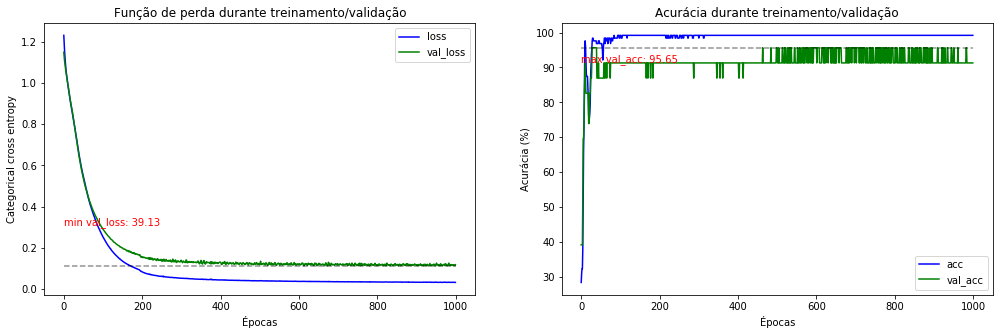

In [502]:
loss, val_loss = np.array(history.history['loss']), np.array(history.history['val_loss'])
acc, val_acc = np.array(history.history['categorical_accuracy'])*100, \
               np.array(history.history['val_categorical_accuracy'])*100
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax[0].plot(loss, label='loss', color='blue')
ax[0].plot(val_loss, label='val_loss', color='green')
ax[0].plot([0, len(val_loss)], [val_loss.min(), val_loss.min()], color='#0000006D', linestyle='--')
ax[0].text(0, val_loss.min()+.2, 'min val_loss: %.2f'%val_acc.min(), color='red')
ax[0].legend()
ax[0].set_title('Função de perda durante treinamento/validação')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Categorical cross entropy')
ax[1].plot(acc, label='acc', color='blue')
ax[1].plot(val_acc, label='val_acc', color='green')
ax[1].plot([0, len(val_acc)], [val_acc.max(), val_acc.max()], color='#0000006D', linestyle='--')
ax[1].text(0, val_acc.max()-4, 'max val_acc: %.2f'%val_acc.max(), color='red')
ax[1].legend()
ax[1].set_title('Acurácia durante treinamento/validação')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Acurácia (%)')

plt.savefig('results/metrics_002_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

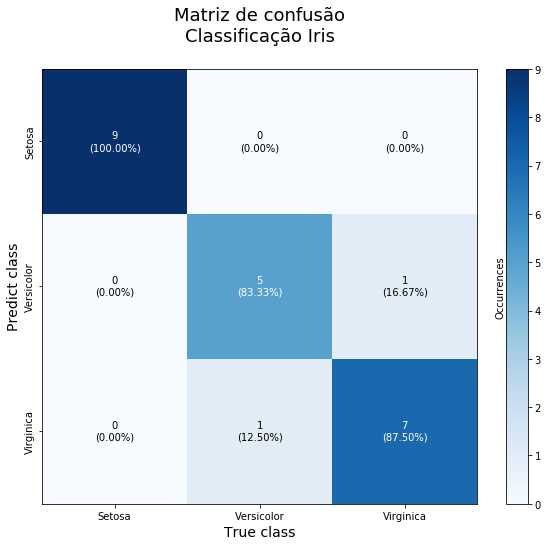

In [503]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
figsize = (15, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)

cmap = plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)

total_samples = cm.sum(axis=1)[:, np.newaxis]
normed_conf_mat = cm.astype('float') / total_samples
labels = ['Setosa', 'Versicolor', 'Virginica']
label_font = dict(fontweight='normal', size=14)
title_font = dict(fontweight='normal', size=18)

matshow = ax.matshow(cm, cmap=cmap)
cb = plt.colorbar(matshow, cax=cax, orientation='vertical')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text = str(cm[i, j])
        cell_text += '\n(%.2f%%)' % (normed_conf_mat[i, j] * 100)
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels, rotation=90, va='center')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     ax.set_title('Matriz de confusão para %d testes'%((n*2)*0.2), fontdict=title_font)
ax.set_xlabel('True class', fontdict=label_font)
ax.set_ylabel('Predict class', fontdict=label_font)
cb.ax.set_ylabel('Occurrences', va='center', rotation=-270, labelpad=-40)
ax.set_title('Matriz de confusão\nClassificação Iris', fontdict=title_font)

plt.savefig('results/confusion_matrix_002_iris.pdf', dpi=300, \
           bbox_inches='tight', transparent=False, pad_inches=0.1)
plt.show()

In [504]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=4))
model.add(Dropout(.2))
model.add(Dense(units=8, activation='relu', input_dim=4))
model.add(Dropout(.2))

model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

W1224 14:47:07.733766 140014298031936 deprecation.py:506] From /home/adriano/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 127 samples, validate on 23 samples
Epoch 1/1000
127/127 [==============================] - 1s 8ms/step - loss: 3.5405 - categorical_accuracy: 0.3228 - val_loss: 3.3565 - val_categorical_accuracy: 0.3913
Epoch 2/1000
127/127 [==============================] - 0s 67us/step - loss: 3.3983 - categorical_accuracy: 0.2598 - val_loss: 3.1026 - val_categorical_accuracy: 0.3913
Epoch 3/1000
127/127 [==============================] - 0s 62us/step - loss: 3.7091 - categorical_accuracy: 0.2913 - val_loss: 2.8649 - val_categorical_accuracy: 0.3913
Epoch 4/1000
127/127 [==============================] - 0s 66us/step - loss: 3.0474 - categorical_accuracy: 0.3228 - val_loss: 2.6406 - val_categorical_accuracy: 0.3913
Epoch 5/1000
127/127 [==============================] - 0s 91us/step - loss: 2.8276 - categorical_accuracy: 0.2756 - val_loss: 2.4220 - val_categorical_accuracy: 0.3913
Epoch 6/1000
127/127 [==============================] - 0s 80us/step - loss: 2.6872 - categorical_accuracy: 0.3

Epoch 49/1000
127/127 [==============================] - 0s 73us/step - loss: 0.6576 - categorical_accuracy: 0.6457 - val_loss: 0.4732 - val_categorical_accuracy: 0.7826
Epoch 50/1000
127/127 [==============================] - 0s 65us/step - loss: 0.7517 - categorical_accuracy: 0.6299 - val_loss: 0.4713 - val_categorical_accuracy: 0.7826
Epoch 51/1000
127/127 [==============================] - 0s 60us/step - loss: 0.6296 - categorical_accuracy: 0.6535 - val_loss: 0.4669 - val_categorical_accuracy: 0.7826
Epoch 52/1000
127/127 [==============================] - 0s 69us/step - loss: 0.6475 - categorical_accuracy: 0.6693 - val_loss: 0.4627 - val_categorical_accuracy: 0.7826
Epoch 53/1000
127/127 [==============================] - 0s 59us/step - loss: 0.6865 - categorical_accuracy: 0.6850 - val_loss: 0.4577 - val_categorical_accuracy: 0.7826
Epoch 54/1000
127/127 [==============================] - 0s 74us/step - loss: 0.6497 - categorical_accuracy: 0.6614 - val_loss: 0.4540 - val_categoric

127/127 [==============================] - 0s 115us/step - loss: 0.5507 - categorical_accuracy: 0.7165 - val_loss: 0.3749 - val_categorical_accuracy: 0.8696
Epoch 98/1000
127/127 [==============================] - 0s 110us/step - loss: 0.6056 - categorical_accuracy: 0.6929 - val_loss: 0.3671 - val_categorical_accuracy: 0.8696
Epoch 99/1000
127/127 [==============================] - 0s 96us/step - loss: 0.5057 - categorical_accuracy: 0.7953 - val_loss: 0.3582 - val_categorical_accuracy: 0.8696
Epoch 100/1000
127/127 [==============================] - 0s 86us/step - loss: 0.5414 - categorical_accuracy: 0.8031 - val_loss: 0.3524 - val_categorical_accuracy: 0.9130
Epoch 101/1000
127/127 [==============================] - 0s 103us/step - loss: 0.5662 - categorical_accuracy: 0.7165 - val_loss: 0.3499 - val_categorical_accuracy: 0.9130
Epoch 102/1000
127/127 [==============================] - 0s 116us/step - loss: 0.5467 - categorical_accuracy: 0.7087 - val_loss: 0.3508 - val_categorical_accu

Epoch 145/1000
127/127 [==============================] - 0s 60us/step - loss: 0.4323 - categorical_accuracy: 0.8031 - val_loss: 0.2838 - val_categorical_accuracy: 0.9565
Epoch 146/1000
127/127 [==============================] - 0s 77us/step - loss: 0.4657 - categorical_accuracy: 0.8268 - val_loss: 0.2896 - val_categorical_accuracy: 0.9130
Epoch 147/1000
127/127 [==============================] - 0s 57us/step - loss: 0.4818 - categorical_accuracy: 0.7953 - val_loss: 0.2885 - val_categorical_accuracy: 0.9130
Epoch 148/1000
127/127 [==============================] - 0s 75us/step - loss: 0.4446 - categorical_accuracy: 0.8189 - val_loss: 0.2851 - val_categorical_accuracy: 0.9130
Epoch 149/1000
127/127 [==============================] - 0s 75us/step - loss: 0.4843 - categorical_accuracy: 0.7559 - val_loss: 0.2882 - val_categorical_accuracy: 0.9130
Epoch 150/1000
127/127 [==============================] - 0s 68us/step - loss: 0.4380 - categorical_accuracy: 0.8189 - val_loss: 0.2902 - val_cat

Epoch 193/1000
127/127 [==============================] - 0s 102us/step - loss: 0.3648 - categorical_accuracy: 0.8189 - val_loss: 0.2594 - val_categorical_accuracy: 0.9130
Epoch 194/1000
127/127 [==============================] - 0s 83us/step - loss: 0.3495 - categorical_accuracy: 0.8346 - val_loss: 0.2602 - val_categorical_accuracy: 0.9130
Epoch 195/1000
127/127 [==============================] - 0s 74us/step - loss: 0.3746 - categorical_accuracy: 0.8504 - val_loss: 0.2578 - val_categorical_accuracy: 0.9130
Epoch 196/1000
127/127 [==============================] - 0s 77us/step - loss: 0.3323 - categorical_accuracy: 0.8661 - val_loss: 0.2568 - val_categorical_accuracy: 0.9130
Epoch 197/1000
127/127 [==============================] - 0s 80us/step - loss: 0.3472 - categorical_accuracy: 0.8898 - val_loss: 0.2545 - val_categorical_accuracy: 0.9130
Epoch 198/1000
127/127 [==============================] - 0s 62us/step - loss: 0.3594 - categorical_accuracy: 0.8661 - val_loss: 0.2557 - val_ca

Epoch 241/1000
127/127 [==============================] - 0s 72us/step - loss: 0.3665 - categorical_accuracy: 0.8661 - val_loss: 0.2248 - val_categorical_accuracy: 0.9565
Epoch 242/1000
127/127 [==============================] - 0s 65us/step - loss: 0.3519 - categorical_accuracy: 0.8819 - val_loss: 0.2221 - val_categorical_accuracy: 0.9565
Epoch 243/1000
127/127 [==============================] - 0s 87us/step - loss: 0.3836 - categorical_accuracy: 0.8504 - val_loss: 0.2233 - val_categorical_accuracy: 0.9565
Epoch 244/1000
127/127 [==============================] - 0s 84us/step - loss: 0.3513 - categorical_accuracy: 0.8819 - val_loss: 0.2257 - val_categorical_accuracy: 0.9565
Epoch 245/1000
127/127 [==============================] - 0s 75us/step - loss: 0.3324 - categorical_accuracy: 0.8740 - val_loss: 0.2314 - val_categorical_accuracy: 0.9565
Epoch 246/1000
127/127 [==============================] - 0s 74us/step - loss: 0.3040 - categorical_accuracy: 0.8976 - val_loss: 0.2277 - val_cat

127/127 [==============================] - 0s 74us/step - loss: 0.2848 - categorical_accuracy: 0.9370 - val_loss: 0.2096 - val_categorical_accuracy: 0.9565
Epoch 289/1000
127/127 [==============================] - 0s 76us/step - loss: 0.3421 - categorical_accuracy: 0.8661 - val_loss: 0.2133 - val_categorical_accuracy: 0.9130
Epoch 290/1000
127/127 [==============================] - 0s 84us/step - loss: 0.3187 - categorical_accuracy: 0.8740 - val_loss: 0.2075 - val_categorical_accuracy: 0.9565
Epoch 291/1000
127/127 [==============================] - 0s 92us/step - loss: 0.2330 - categorical_accuracy: 0.9213 - val_loss: 0.2007 - val_categorical_accuracy: 0.9565
Epoch 292/1000
127/127 [==============================] - 0s 67us/step - loss: 0.3632 - categorical_accuracy: 0.8740 - val_loss: 0.2026 - val_categorical_accuracy: 0.9565
Epoch 293/1000
127/127 [==============================] - 0s 82us/step - loss: 0.3275 - categorical_accuracy: 0.9134 - val_loss: 0.2056 - val_categorical_accura

Epoch 336/1000
127/127 [==============================] - 0s 84us/step - loss: 0.2918 - categorical_accuracy: 0.9055 - val_loss: 0.2033 - val_categorical_accuracy: 0.9130
Epoch 337/1000
127/127 [==============================] - 0s 106us/step - loss: 0.2565 - categorical_accuracy: 0.9213 - val_loss: 0.1974 - val_categorical_accuracy: 0.9565
Epoch 338/1000
127/127 [==============================] - 0s 93us/step - loss: 0.2780 - categorical_accuracy: 0.9134 - val_loss: 0.1991 - val_categorical_accuracy: 0.9130
Epoch 339/1000
127/127 [==============================] - 0s 80us/step - loss: 0.2184 - categorical_accuracy: 0.9291 - val_loss: 0.2016 - val_categorical_accuracy: 0.9130
Epoch 340/1000
127/127 [==============================] - 0s 87us/step - loss: 0.2504 - categorical_accuracy: 0.9055 - val_loss: 0.1959 - val_categorical_accuracy: 0.9565
Epoch 341/1000
127/127 [==============================] - 0s 109us/step - loss: 0.2397 - categorical_accuracy: 0.9291 - val_loss: 0.1961 - val_c

Epoch 384/1000
127/127 [==============================] - 0s 71us/step - loss: 0.2983 - categorical_accuracy: 0.8976 - val_loss: 0.1981 - val_categorical_accuracy: 0.9130
Epoch 385/1000
127/127 [==============================] - 0s 67us/step - loss: 0.2488 - categorical_accuracy: 0.9606 - val_loss: 0.1996 - val_categorical_accuracy: 0.9130
Epoch 386/1000
127/127 [==============================] - 0s 74us/step - loss: 0.2472 - categorical_accuracy: 0.9134 - val_loss: 0.1966 - val_categorical_accuracy: 0.9130
Epoch 387/1000
127/127 [==============================] - 0s 60us/step - loss: 0.3023 - categorical_accuracy: 0.8819 - val_loss: 0.1883 - val_categorical_accuracy: 0.9565
Epoch 388/1000
127/127 [==============================] - 0s 75us/step - loss: 0.2651 - categorical_accuracy: 0.9213 - val_loss: 0.1805 - val_categorical_accuracy: 0.9565
Epoch 389/1000
127/127 [==============================] - 0s 53us/step - loss: 0.2133 - categorical_accuracy: 0.9213 - val_loss: 0.1786 - val_cat

127/127 [==============================] - 0s 97us/step - loss: 0.2505 - categorical_accuracy: 0.9213 - val_loss: 0.1627 - val_categorical_accuracy: 0.9565
Epoch 432/1000
127/127 [==============================] - 0s 92us/step - loss: 0.2057 - categorical_accuracy: 0.9370 - val_loss: 0.1803 - val_categorical_accuracy: 0.9565
Epoch 433/1000
127/127 [==============================] - 0s 96us/step - loss: 0.2410 - categorical_accuracy: 0.9291 - val_loss: 0.1962 - val_categorical_accuracy: 0.9130
Epoch 434/1000
127/127 [==============================] - 0s 113us/step - loss: 0.2438 - categorical_accuracy: 0.9213 - val_loss: 0.2078 - val_categorical_accuracy: 0.9130
Epoch 435/1000
127/127 [==============================] - 0s 105us/step - loss: 0.2252 - categorical_accuracy: 0.9449 - val_loss: 0.2027 - val_categorical_accuracy: 0.9130
Epoch 436/1000
127/127 [==============================] - 0s 99us/step - loss: 0.2422 - categorical_accuracy: 0.9291 - val_loss: 0.1892 - val_categorical_accu

Epoch 479/1000
127/127 [==============================] - 0s 82us/step - loss: 0.2275 - categorical_accuracy: 0.9213 - val_loss: 0.1757 - val_categorical_accuracy: 0.9565
Epoch 480/1000
127/127 [==============================] - 0s 67us/step - loss: 0.1917 - categorical_accuracy: 0.9528 - val_loss: 0.1798 - val_categorical_accuracy: 0.9130
Epoch 481/1000
127/127 [==============================] - 0s 80us/step - loss: 0.1657 - categorical_accuracy: 0.9606 - val_loss: 0.1772 - val_categorical_accuracy: 0.9130
Epoch 482/1000
127/127 [==============================] - 0s 79us/step - loss: 0.2296 - categorical_accuracy: 0.9370 - val_loss: 0.1730 - val_categorical_accuracy: 0.9565
Epoch 483/1000
127/127 [==============================] - 0s 65us/step - loss: 0.1965 - categorical_accuracy: 0.9528 - val_loss: 0.1667 - val_categorical_accuracy: 0.9565
Epoch 484/1000
127/127 [==============================] - 0s 64us/step - loss: 0.2405 - categorical_accuracy: 0.9528 - val_loss: 0.1652 - val_cat

Epoch 527/1000
127/127 [==============================] - 0s 98us/step - loss: 0.1861 - categorical_accuracy: 0.9449 - val_loss: 0.1654 - val_categorical_accuracy: 0.9565
Epoch 528/1000
127/127 [==============================] - 0s 111us/step - loss: 0.2290 - categorical_accuracy: 0.9291 - val_loss: 0.1745 - val_categorical_accuracy: 0.9130
Epoch 529/1000
127/127 [==============================] - 0s 123us/step - loss: 0.1997 - categorical_accuracy: 0.9370 - val_loss: 0.1844 - val_categorical_accuracy: 0.9130
Epoch 530/1000
127/127 [==============================] - 0s 122us/step - loss: 0.2023 - categorical_accuracy: 0.9606 - val_loss: 0.1852 - val_categorical_accuracy: 0.9130
Epoch 531/1000
127/127 [==============================] - 0s 113us/step - loss: 0.2218 - categorical_accuracy: 0.9606 - val_loss: 0.1768 - val_categorical_accuracy: 0.9130
Epoch 532/1000
127/127 [==============================] - 0s 113us/step - loss: 0.2199 - categorical_accuracy: 0.9134 - val_loss: 0.1621 - va

127/127 [==============================] - 0s 65us/step - loss: 0.1811 - categorical_accuracy: 0.9370 - val_loss: 0.1549 - val_categorical_accuracy: 0.9565
Epoch 575/1000
127/127 [==============================] - 0s 72us/step - loss: 0.1862 - categorical_accuracy: 0.9449 - val_loss: 0.1728 - val_categorical_accuracy: 0.9130
Epoch 576/1000
127/127 [==============================] - 0s 74us/step - loss: 0.2171 - categorical_accuracy: 0.9449 - val_loss: 0.1845 - val_categorical_accuracy: 0.9130
Epoch 577/1000
127/127 [==============================] - 0s 63us/step - loss: 0.1764 - categorical_accuracy: 0.9606 - val_loss: 0.1737 - val_categorical_accuracy: 0.9130
Epoch 578/1000
127/127 [==============================] - 0s 71us/step - loss: 0.2188 - categorical_accuracy: 0.9449 - val_loss: 0.1626 - val_categorical_accuracy: 0.9565
Epoch 579/1000
127/127 [==============================] - 0s 58us/step - loss: 0.2292 - categorical_accuracy: 0.9449 - val_loss: 0.1551 - val_categorical_accura

Epoch 622/1000
127/127 [==============================] - 0s 96us/step - loss: 0.2264 - categorical_accuracy: 0.9528 - val_loss: 0.1518 - val_categorical_accuracy: 0.9565
Epoch 623/1000
127/127 [==============================] - 0s 88us/step - loss: 0.1936 - categorical_accuracy: 0.9528 - val_loss: 0.1551 - val_categorical_accuracy: 0.9130
Epoch 624/1000
127/127 [==============================] - 0s 67us/step - loss: 0.1442 - categorical_accuracy: 0.9528 - val_loss: 0.1607 - val_categorical_accuracy: 0.9130
Epoch 625/1000
127/127 [==============================] - 0s 69us/step - loss: 0.1748 - categorical_accuracy: 0.9449 - val_loss: 0.1582 - val_categorical_accuracy: 0.9130
Epoch 626/1000
127/127 [==============================] - 0s 63us/step - loss: 0.2051 - categorical_accuracy: 0.9449 - val_loss: 0.1505 - val_categorical_accuracy: 0.9565
Epoch 627/1000
127/127 [==============================] - 0s 77us/step - loss: 0.1589 - categorical_accuracy: 0.9606 - val_loss: 0.1509 - val_cat

127/127 [==============================] - 0s 85us/step - loss: 0.1637 - categorical_accuracy: 0.9606 - val_loss: 0.1616 - val_categorical_accuracy: 0.9130
Epoch 670/1000
127/127 [==============================] - 0s 83us/step - loss: 0.1818 - categorical_accuracy: 0.9528 - val_loss: 0.1509 - val_categorical_accuracy: 0.9565
Epoch 671/1000
127/127 [==============================] - 0s 79us/step - loss: 0.1206 - categorical_accuracy: 0.9764 - val_loss: 0.1406 - val_categorical_accuracy: 0.9565
Epoch 672/1000
127/127 [==============================] - 0s 81us/step - loss: 0.2357 - categorical_accuracy: 0.9370 - val_loss: 0.1429 - val_categorical_accuracy: 0.9565
Epoch 673/1000
127/127 [==============================] - 0s 79us/step - loss: 0.1620 - categorical_accuracy: 0.9685 - val_loss: 0.1621 - val_categorical_accuracy: 0.9130
Epoch 674/1000
127/127 [==============================] - 0s 90us/step - loss: 0.1723 - categorical_accuracy: 0.9606 - val_loss: 0.1783 - val_categorical_accura

Epoch 717/1000
127/127 [==============================] - 0s 79us/step - loss: 0.1571 - categorical_accuracy: 0.9606 - val_loss: 0.1474 - val_categorical_accuracy: 0.9130
Epoch 718/1000
127/127 [==============================] - 0s 67us/step - loss: 0.1524 - categorical_accuracy: 0.9370 - val_loss: 0.1462 - val_categorical_accuracy: 0.9130
Epoch 719/1000
127/127 [==============================] - 0s 68us/step - loss: 0.1504 - categorical_accuracy: 0.9685 - val_loss: 0.1440 - val_categorical_accuracy: 0.9130
Epoch 720/1000
127/127 [==============================] - 0s 78us/step - loss: 0.2049 - categorical_accuracy: 0.9291 - val_loss: 0.1480 - val_categorical_accuracy: 0.9130
Epoch 721/1000
127/127 [==============================] - 0s 54us/step - loss: 0.1393 - categorical_accuracy: 0.9764 - val_loss: 0.1429 - val_categorical_accuracy: 0.9565
Epoch 722/1000
127/127 [==============================] - 0s 77us/step - loss: 0.1345 - categorical_accuracy: 0.9843 - val_loss: 0.1414 - val_cat

Epoch 765/1000
127/127 [==============================] - 0s 83us/step - loss: 0.1397 - categorical_accuracy: 0.9528 - val_loss: 0.1249 - val_categorical_accuracy: 0.9565
Epoch 766/1000
127/127 [==============================] - 0s 69us/step - loss: 0.1773 - categorical_accuracy: 0.9528 - val_loss: 0.1287 - val_categorical_accuracy: 0.9565
Epoch 767/1000
127/127 [==============================] - 0s 66us/step - loss: 0.1629 - categorical_accuracy: 0.9606 - val_loss: 0.1357 - val_categorical_accuracy: 0.9565
Epoch 768/1000
127/127 [==============================] - 0s 86us/step - loss: 0.1182 - categorical_accuracy: 0.9685 - val_loss: 0.1359 - val_categorical_accuracy: 0.9565
Epoch 769/1000
127/127 [==============================] - 0s 66us/step - loss: 0.1394 - categorical_accuracy: 0.9685 - val_loss: 0.1457 - val_categorical_accuracy: 0.9130
Epoch 770/1000
127/127 [==============================] - 0s 86us/step - loss: 0.1474 - categorical_accuracy: 0.9528 - val_loss: 0.1629 - val_cat

Epoch 813/1000
127/127 [==============================] - 0s 77us/step - loss: 0.1308 - categorical_accuracy: 0.9685 - val_loss: 0.1320 - val_categorical_accuracy: 0.9565
Epoch 814/1000
127/127 [==============================] - 0s 59us/step - loss: 0.1154 - categorical_accuracy: 0.9764 - val_loss: 0.1257 - val_categorical_accuracy: 0.9565
Epoch 815/1000
127/127 [==============================] - 0s 77us/step - loss: 0.1439 - categorical_accuracy: 0.9606 - val_loss: 0.1370 - val_categorical_accuracy: 0.9565
Epoch 816/1000
127/127 [==============================] - 0s 77us/step - loss: 0.1411 - categorical_accuracy: 0.9764 - val_loss: 0.1525 - val_categorical_accuracy: 0.9130
Epoch 817/1000
127/127 [==============================] - 0s 71us/step - loss: 0.1733 - categorical_accuracy: 0.9370 - val_loss: 0.1651 - val_categorical_accuracy: 0.9130
Epoch 818/1000
127/127 [==============================] - 0s 75us/step - loss: 0.1578 - categorical_accuracy: 0.9528 - val_loss: 0.1583 - val_cat

Epoch 861/1000
127/127 [==============================] - 0s 63us/step - loss: 0.1359 - categorical_accuracy: 0.9685 - val_loss: 0.1364 - val_categorical_accuracy: 0.9565
Epoch 862/1000
127/127 [==============================] - 0s 76us/step - loss: 0.1743 - categorical_accuracy: 0.9449 - val_loss: 0.1427 - val_categorical_accuracy: 0.9130
Epoch 863/1000
127/127 [==============================] - 0s 83us/step - loss: 0.1333 - categorical_accuracy: 0.9764 - val_loss: 0.1552 - val_categorical_accuracy: 0.9130
Epoch 864/1000
127/127 [==============================] - 0s 110us/step - loss: 0.1287 - categorical_accuracy: 0.9606 - val_loss: 0.1537 - val_categorical_accuracy: 0.9130
Epoch 865/1000
127/127 [==============================] - 0s 109us/step - loss: 0.0986 - categorical_accuracy: 0.9685 - val_loss: 0.1412 - val_categorical_accuracy: 0.9130
Epoch 866/1000
127/127 [==============================] - 0s 126us/step - loss: 0.1182 - categorical_accuracy: 0.9685 - val_loss: 0.1341 - val_

Epoch 909/1000
127/127 [==============================] - 0s 79us/step - loss: 0.1636 - categorical_accuracy: 0.9449 - val_loss: 0.1167 - val_categorical_accuracy: 0.9565
Epoch 910/1000
127/127 [==============================] - 0s 78us/step - loss: 0.1452 - categorical_accuracy: 0.9606 - val_loss: 0.1176 - val_categorical_accuracy: 0.9565
Epoch 911/1000
127/127 [==============================] - 0s 101us/step - loss: 0.1166 - categorical_accuracy: 0.9685 - val_loss: 0.1301 - val_categorical_accuracy: 0.9130
Epoch 912/1000
127/127 [==============================] - 0s 95us/step - loss: 0.1625 - categorical_accuracy: 0.9528 - val_loss: 0.1416 - val_categorical_accuracy: 0.9130
Epoch 913/1000
127/127 [==============================] - 0s 61us/step - loss: 0.1094 - categorical_accuracy: 0.9764 - val_loss: 0.1504 - val_categorical_accuracy: 0.9130
Epoch 914/1000
127/127 [==============================] - 0s 85us/step - loss: 0.1545 - categorical_accuracy: 0.9528 - val_loss: 0.1578 - val_ca

Epoch 957/1000
127/127 [==============================] - 0s 83us/step - loss: 0.1316 - categorical_accuracy: 0.9685 - val_loss: 0.1726 - val_categorical_accuracy: 0.9130
Epoch 958/1000
127/127 [==============================] - 0s 69us/step - loss: 0.1777 - categorical_accuracy: 0.9370 - val_loss: 0.1674 - val_categorical_accuracy: 0.9130
Epoch 959/1000
127/127 [==============================] - 0s 73us/step - loss: 0.1103 - categorical_accuracy: 0.9764 - val_loss: 0.1431 - val_categorical_accuracy: 0.9130
Epoch 960/1000
127/127 [==============================] - 0s 65us/step - loss: 0.1196 - categorical_accuracy: 0.9606 - val_loss: 0.1291 - val_categorical_accuracy: 0.9565
Epoch 961/1000
127/127 [==============================] - 0s 81us/step - loss: 0.0881 - categorical_accuracy: 0.9843 - val_loss: 0.1193 - val_categorical_accuracy: 0.9565
Epoch 962/1000
127/127 [==============================] - 0s 73us/step - loss: 0.1130 - categorical_accuracy: 0.9685 - val_loss: 0.1148 - val_cat

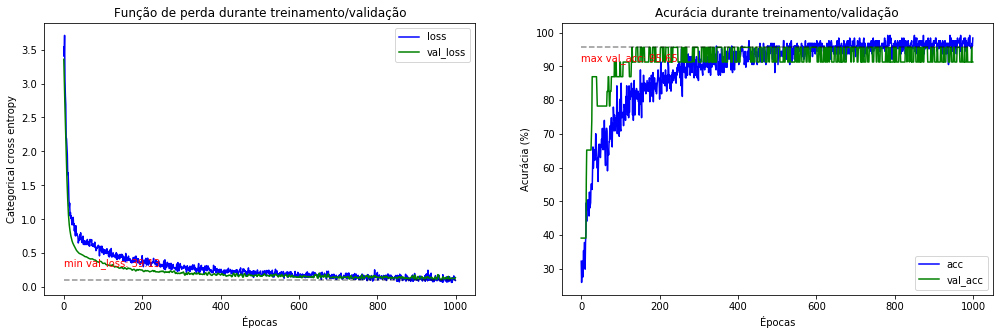

In [505]:
loss, val_loss = np.array(history.history['loss']), np.array(history.history['val_loss'])
acc, val_acc = np.array(history.history['categorical_accuracy'])*100, \
               np.array(history.history['val_categorical_accuracy'])*100
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax[0].plot(loss, label='loss', color='blue')
ax[0].plot(val_loss, label='val_loss', color='green')
ax[0].plot([0, len(val_loss)], [val_loss.min(), val_loss.min()], color='#0000006D', linestyle='--')
ax[0].text(0, val_loss.min()+.2, 'min val_loss: %.2f'%val_acc.min(), color='red')
ax[0].legend()
ax[0].set_title('Função de perda durante treinamento/validação')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Categorical cross entropy')
ax[1].plot(acc, label='acc', color='blue')
ax[1].plot(val_acc, label='val_acc', color='green')
ax[1].plot([0, len(val_acc)], [val_acc.max(), val_acc.max()], color='#0000006D', linestyle='--')
ax[1].text(0, val_acc.max()-4, 'max val_acc: %.2f'%val_acc.max(), color='red')
ax[1].legend()
ax[1].set_title('Acurácia durante treinamento/validação')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Acurácia (%)')

plt.savefig('results/metrics_003_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

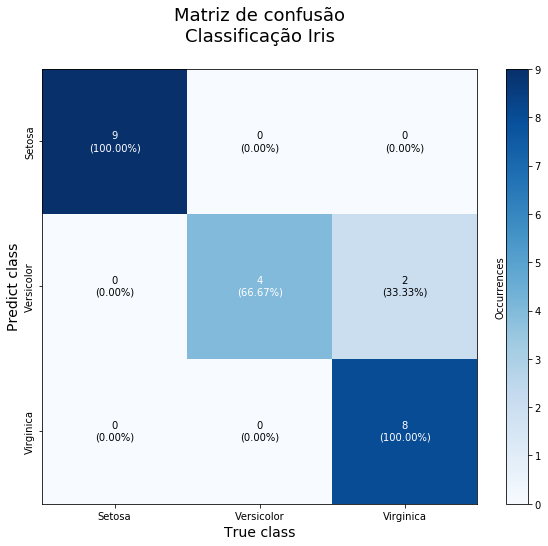

In [506]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
figsize = (15, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)

cmap = plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)

total_samples = cm.sum(axis=1)[:, np.newaxis]
normed_conf_mat = cm.astype('float') / total_samples
labels = ['Setosa', 'Versicolor', 'Virginica']
label_font = dict(fontweight='normal', size=14)
title_font = dict(fontweight='normal', size=18)

matshow = ax.matshow(cm, cmap=cmap)
cb = plt.colorbar(matshow, cax=cax, orientation='vertical')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text = str(cm[i, j])
        cell_text += '\n(%.2f%%)' % (normed_conf_mat[i, j] * 100)
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels, rotation=90, va='center')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     ax.set_title('Matriz de confusão para %d testes'%((n*2)*0.2), fontdict=title_font)
ax.set_xlabel('True class', fontdict=label_font)
ax.set_ylabel('Predict class', fontdict=label_font)
cb.ax.set_ylabel('Occurrences', va='center', rotation=-270, labelpad=-40)
ax.set_title('Matriz de confusão\nClassificação Iris', fontdict=title_font)

plt.savefig('results/confusion_matrix_003_iris.pdf', dpi=300, \
           bbox_inches='tight', transparent=False, pad_inches=0.1)
plt.show()